In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv("Airline sats train.csv", index_col=0)

In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [5]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.drop('id', axis=1, inplace=True)
cat_columns = [cols for cols in df.columns if df[cols].dtype=='O']
num_columns = [cols for cols in df.columns if df[cols].dtype!='O']
print("Numerical columns : {} \n\n\nCategorical Columns : {}".format(num_columns, cat_columns))

Numerical columns : ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] 


Categorical Columns : ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [7]:
df['satisfaction'].replace({"neutral or dissatisfied": 0, "satisfied": 1}, inplace=True)

In [8]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


In [9]:
cal_values =[]
for val in cat_columns:
    cal_values.append(df[val].unique())

In [10]:
cal_values

[array(['Male', 'Female'], dtype=object),
 array(['Loyal Customer', 'disloyal Customer'], dtype=object),
 array(['Personal Travel', 'Business travel'], dtype=object),
 array(['Eco Plus', 'Business', 'Eco'], dtype=object),
 array([0, 1], dtype=int64)]

In [11]:
num_values =[]
for val in num_columns:
    num_values.append(len(df[val].unique()))

In [12]:
num_values

[75, 3802, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 445, 455]

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhara\anaconda3\lib\si

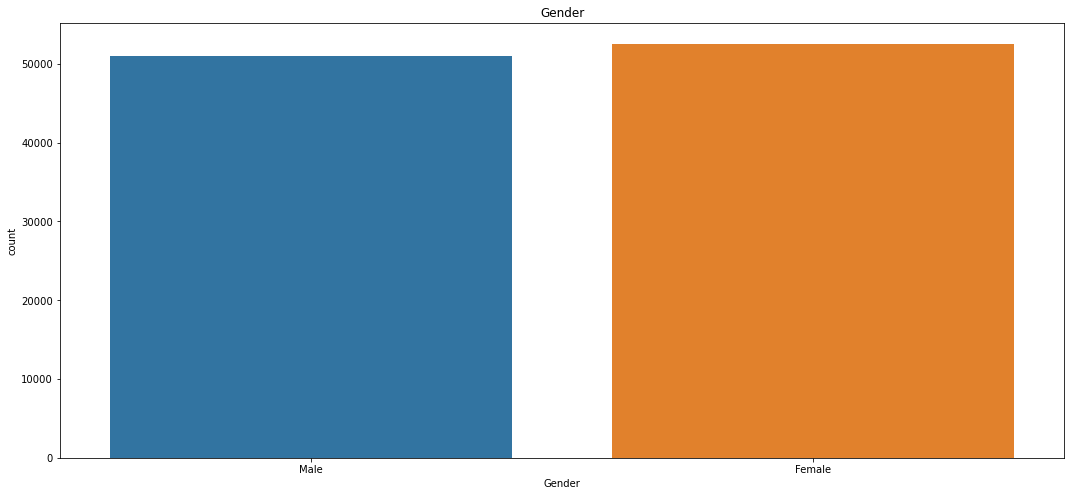

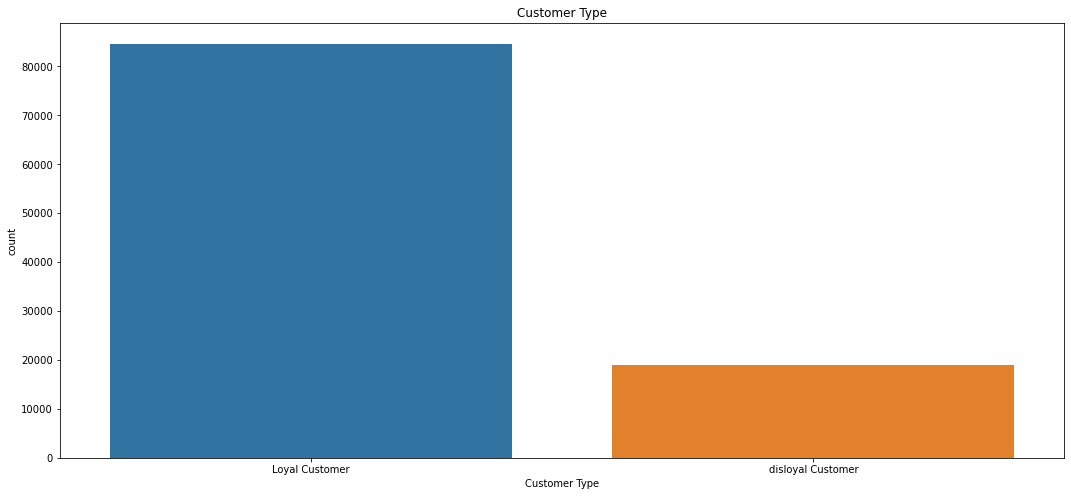

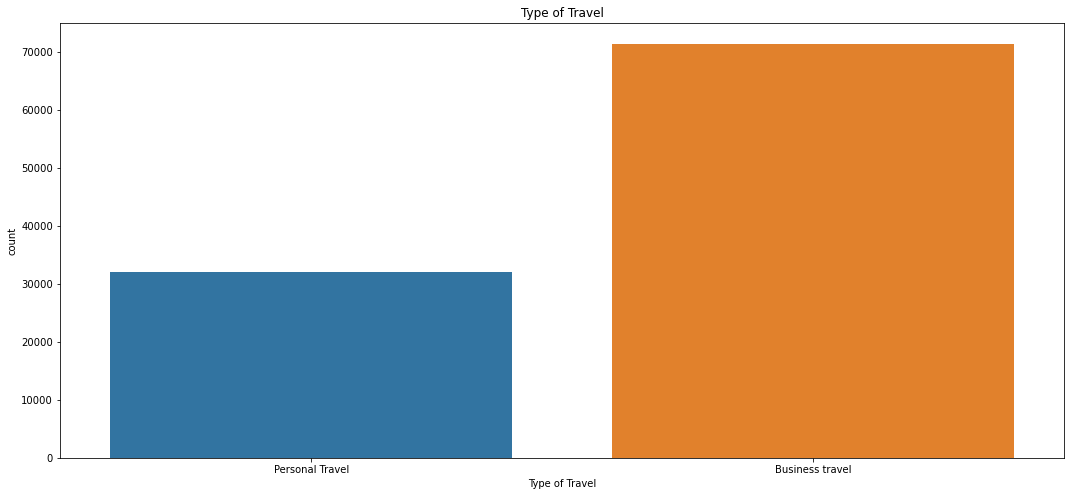

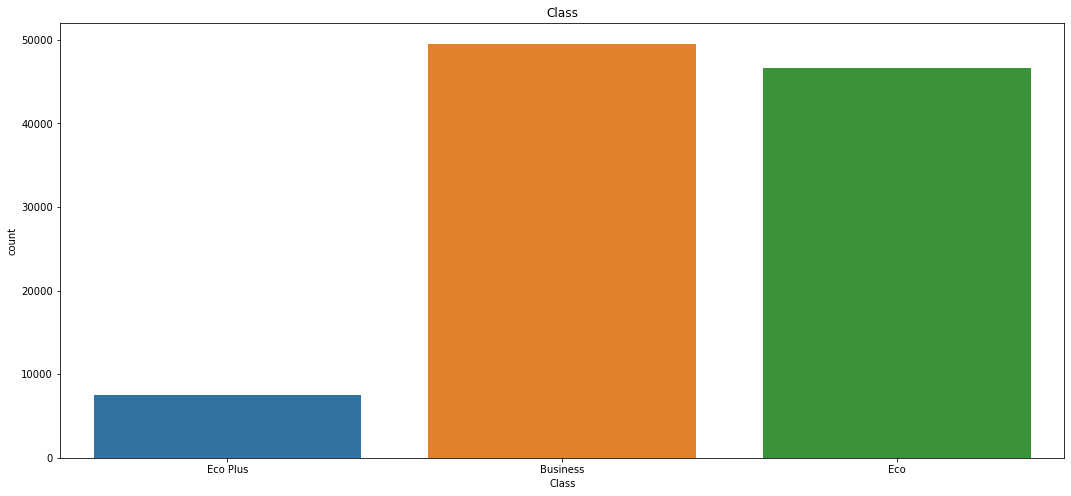

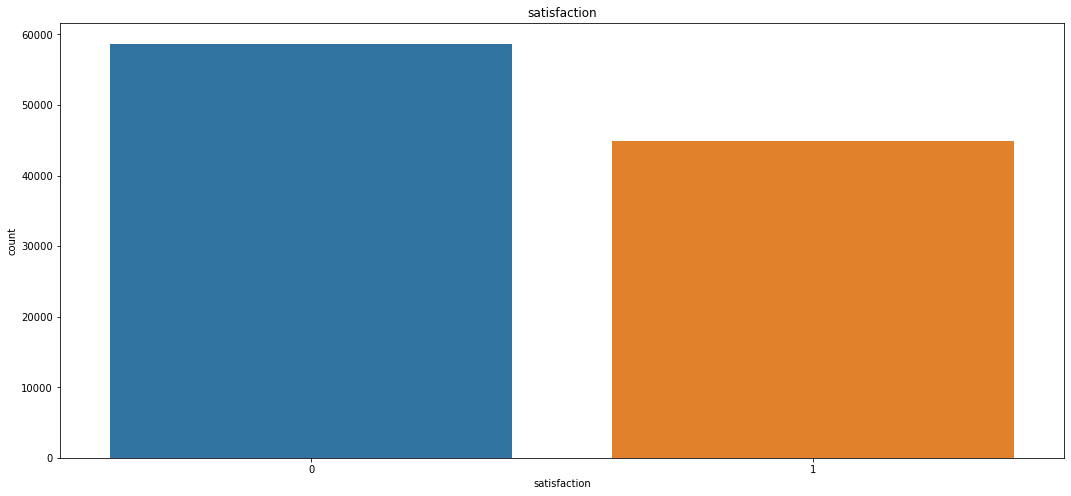

In [13]:
for i in cat_columns:
    plt.figure(figsize=(18,8))
    sns.countplot(df[i])
    plt.title(i)

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhara\anaconda3\lib\si

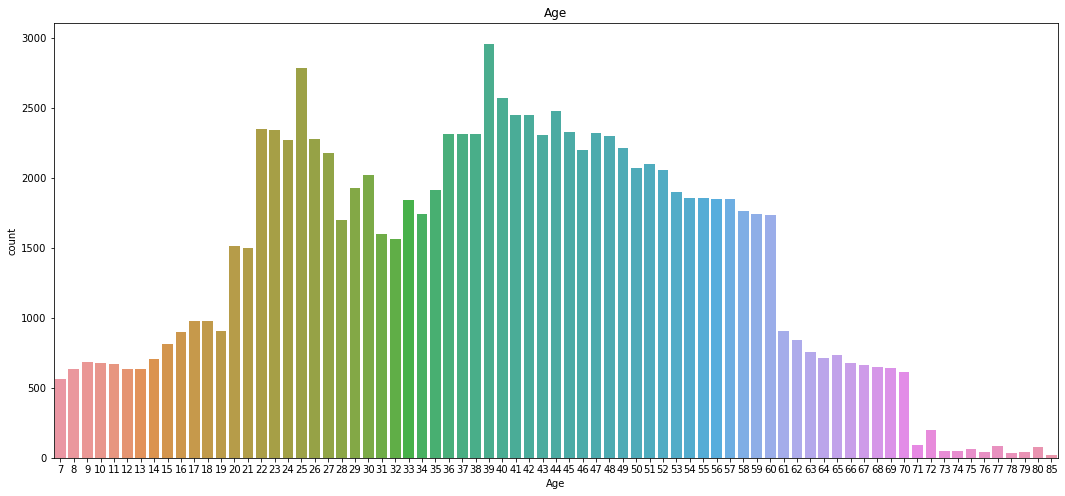

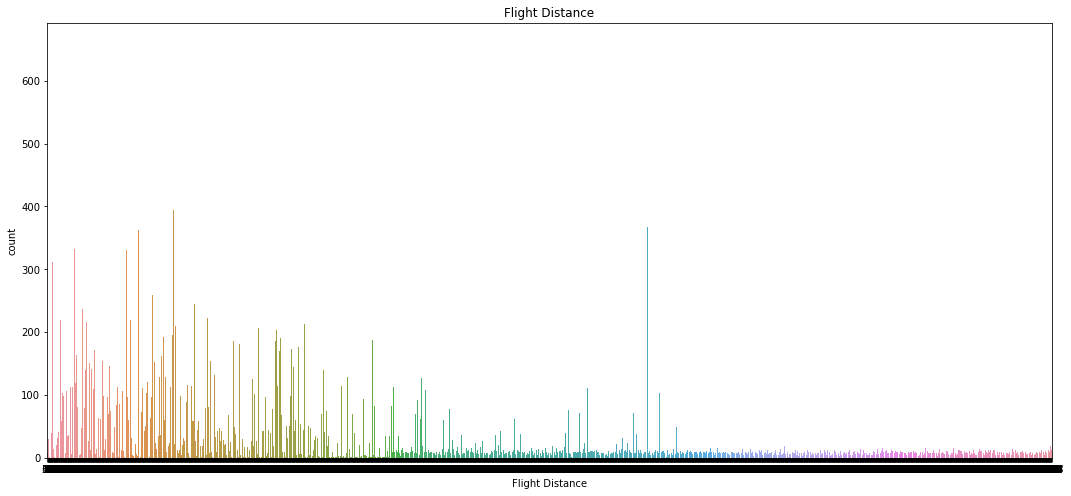

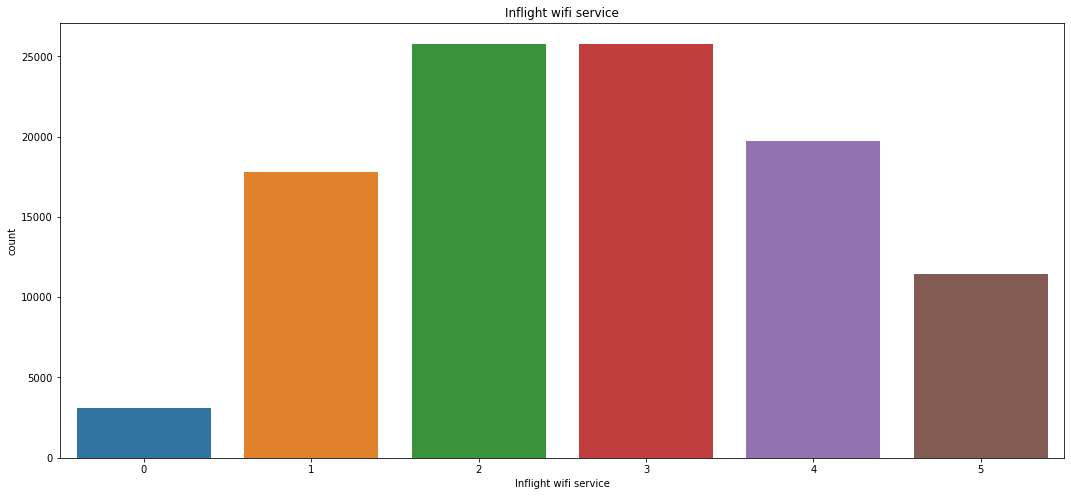

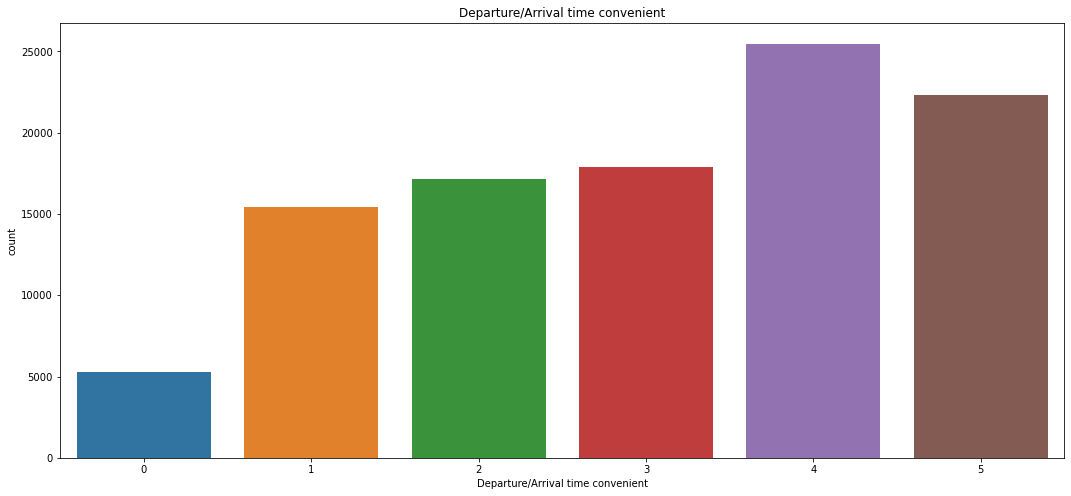

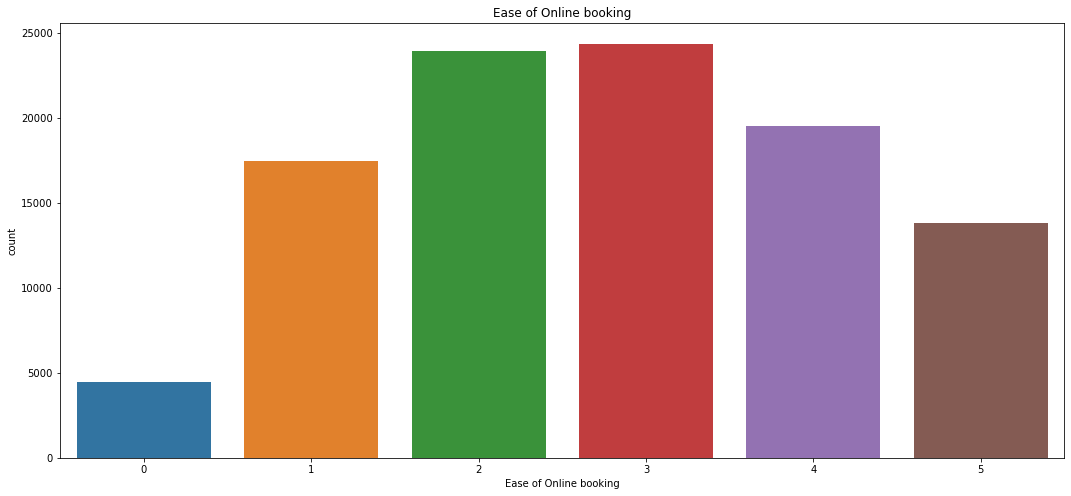

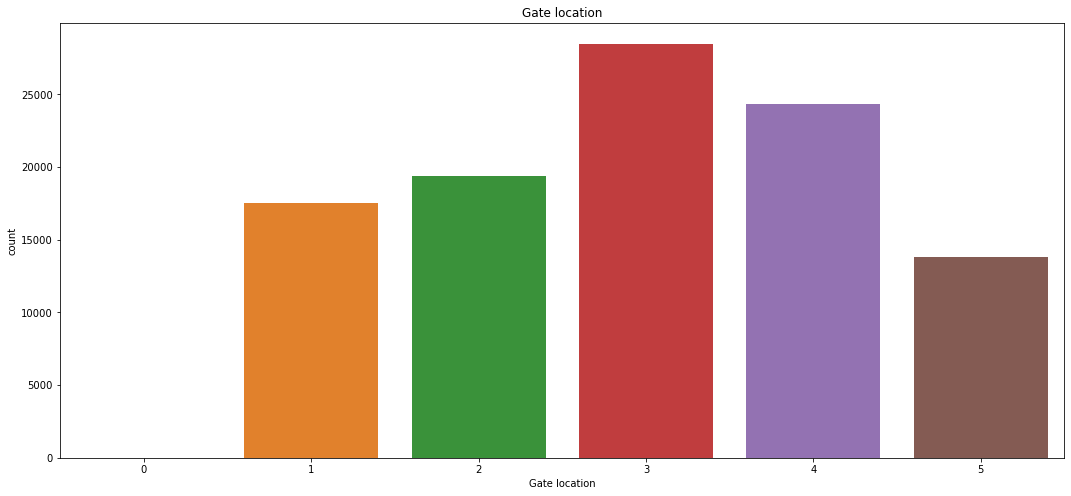

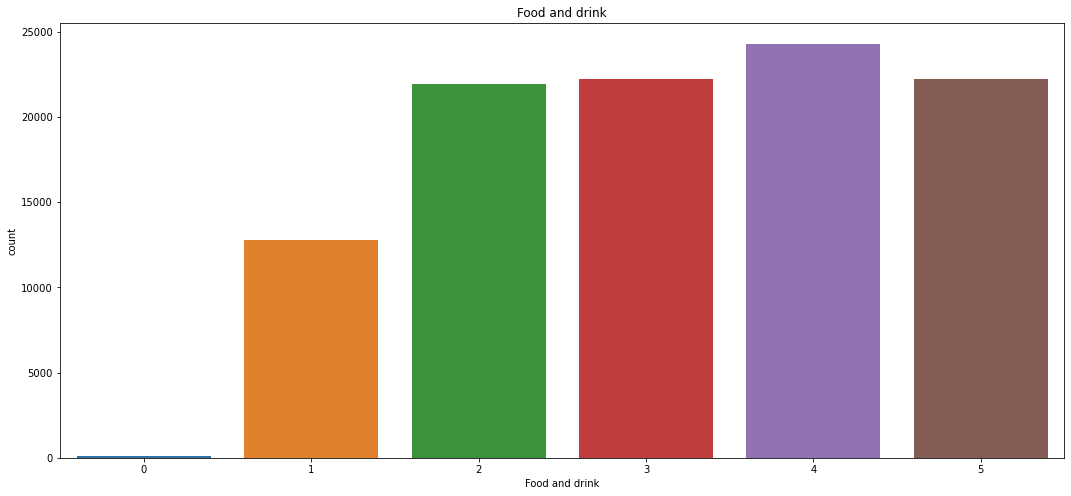

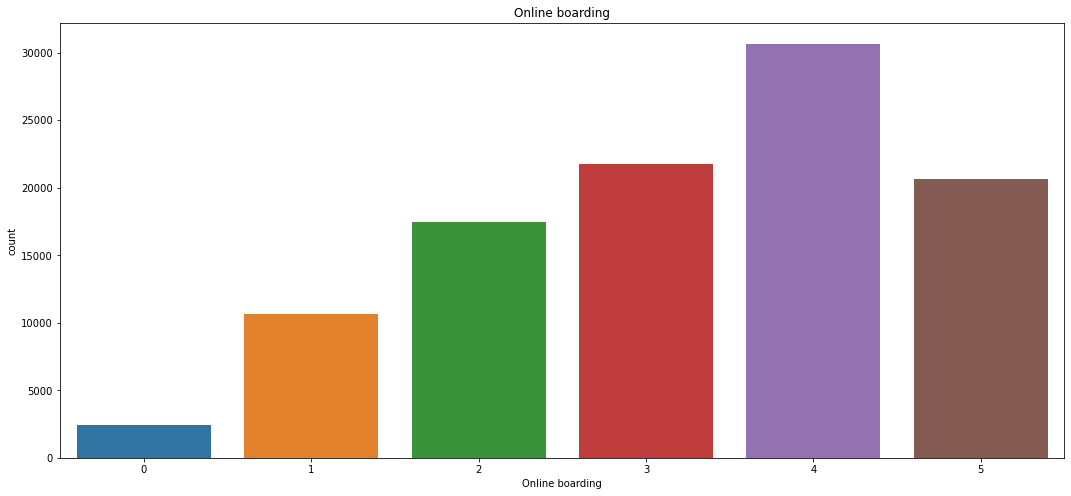

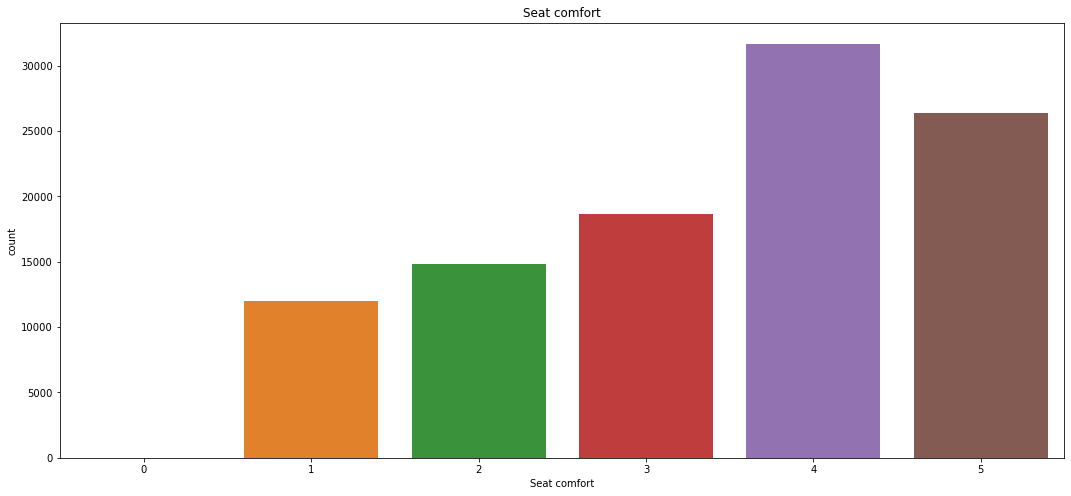

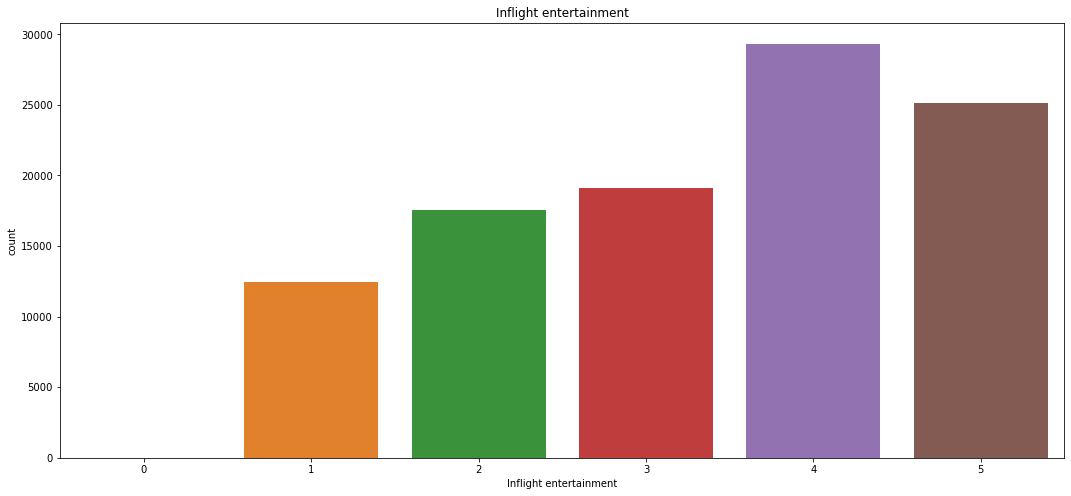

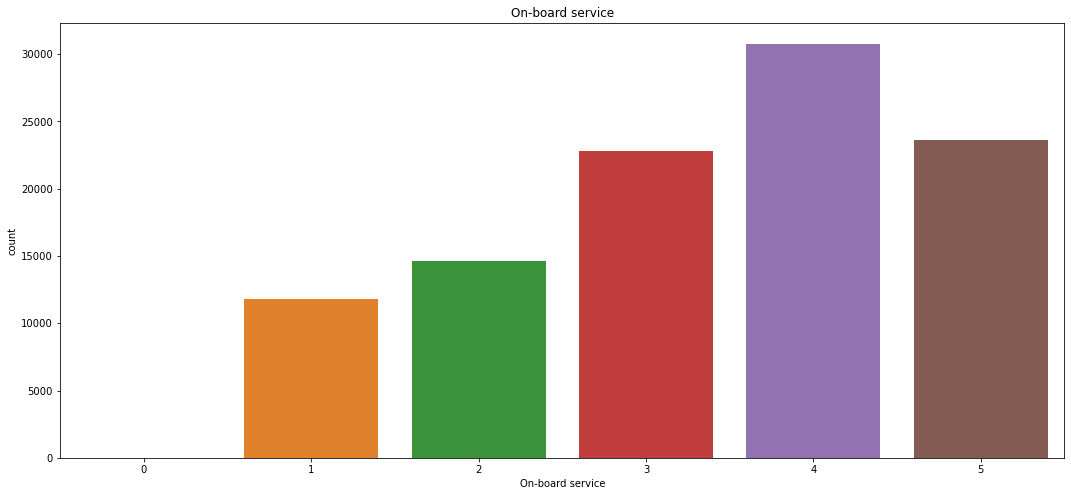

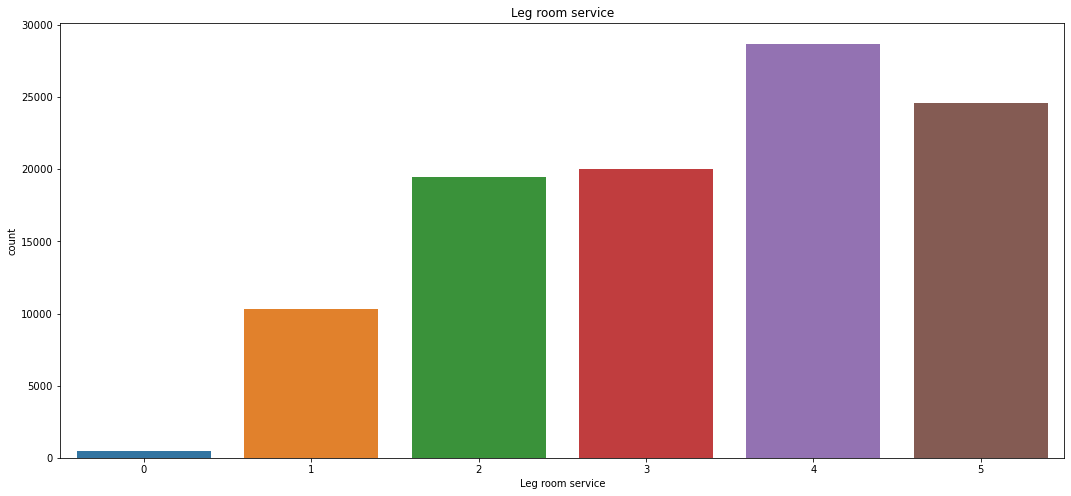

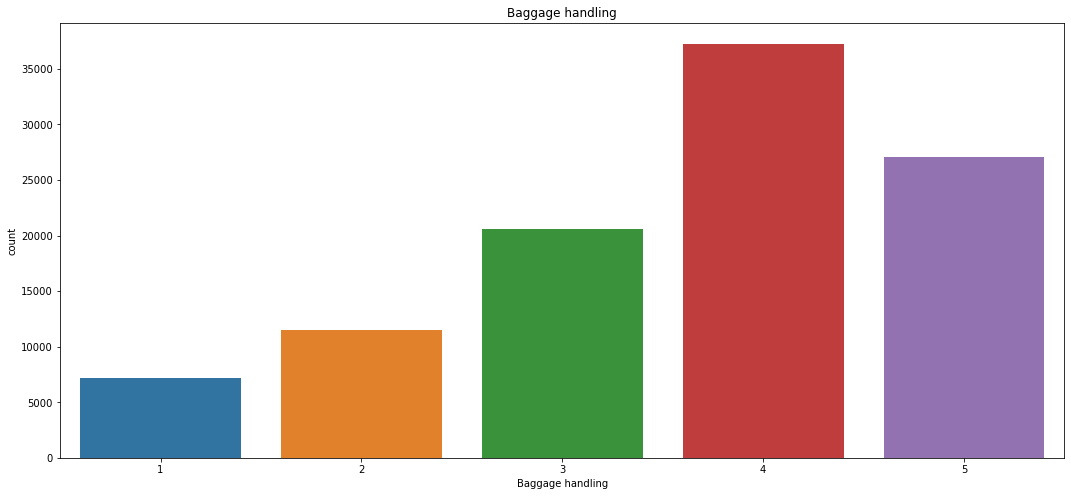

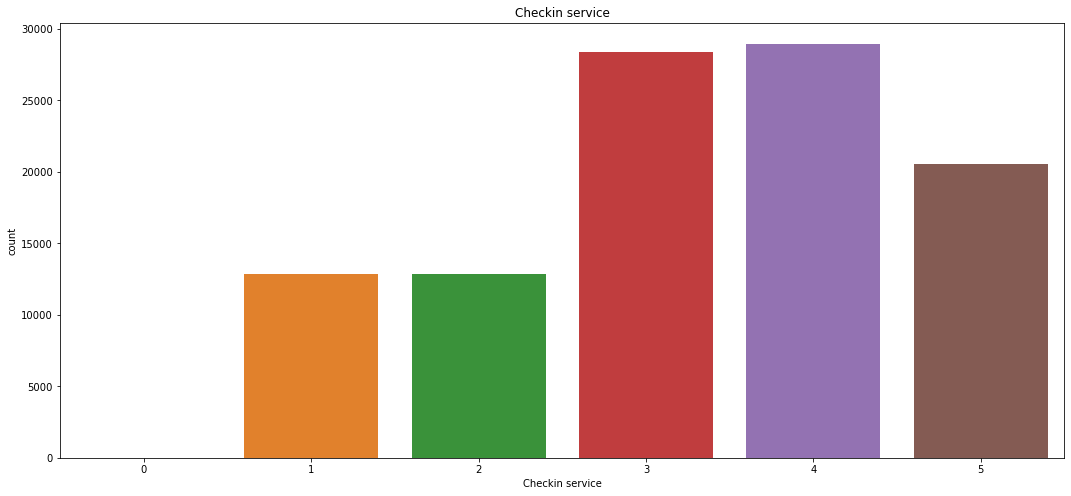

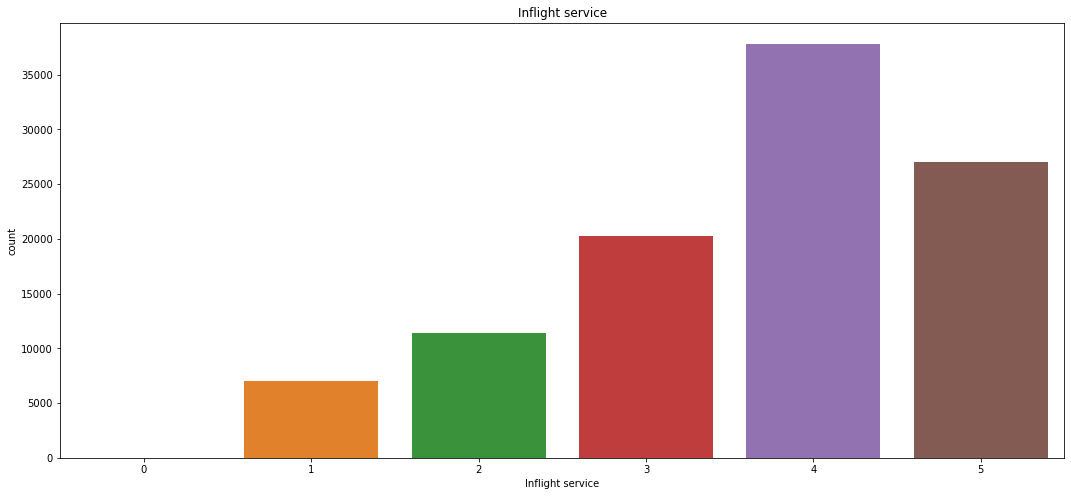

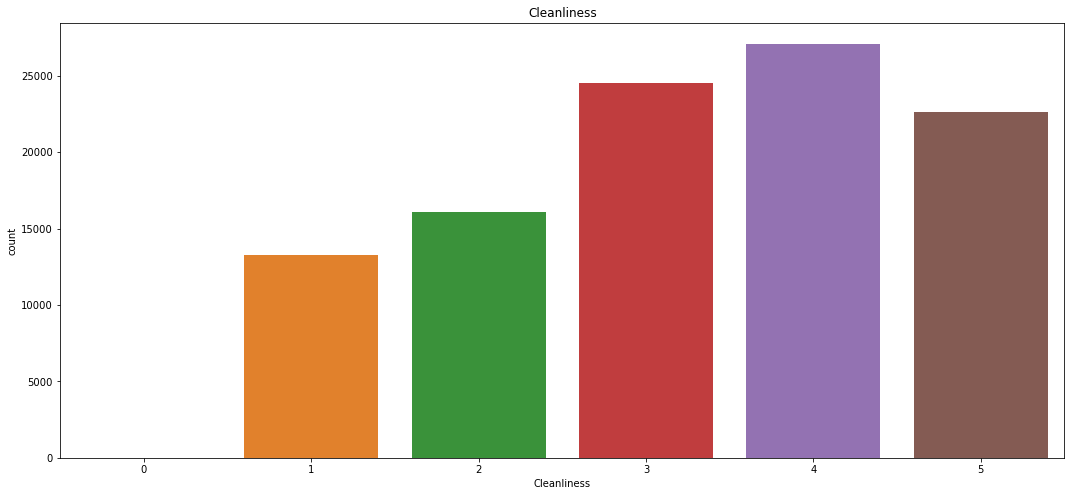

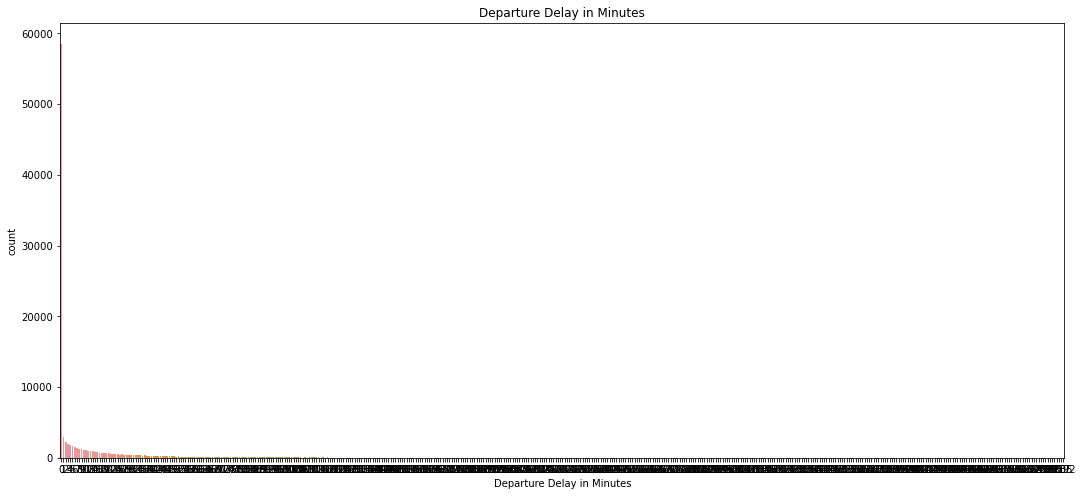

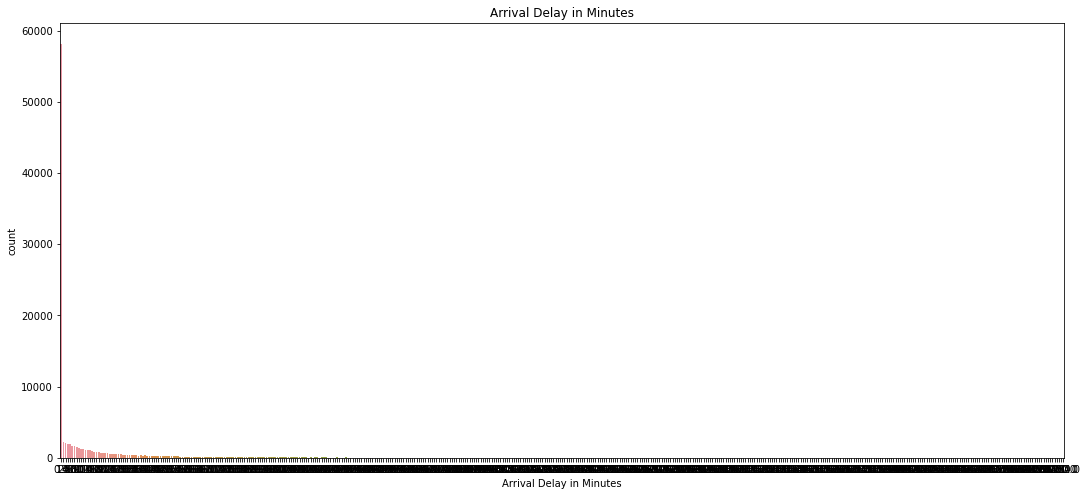

In [14]:
for i in num_columns:
    plt.figure(figsize=(18,8))
    sns.countplot(df[i])
    plt.title(i)

In [16]:
cat_columns

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [17]:
for i in cat_columns:
    print(df[i].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
[0 1]


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
enc = LabelEncoder()

In [21]:
for i in cat_columns:
    df[i+'_enc'] = enc.fit_transform(df[i])

In [33]:
df =df.drop(df[cat_columns], axis=1)

In [34]:
X = df.drop('satisfaction_enc', axis=1)
y = df['satisfaction_enc']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [40]:
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
logistic = LogisticRegression()

In [43]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(confusion_matrix(rfc_pred, y_test))
print('\n')
print(classification_report(rfc_pred, y_test))

[[14373   670]
 [  302 10554]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15043
           1       0.94      0.97      0.96     10856

    accuracy                           0.96     25899
   macro avg       0.96      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899



In [49]:
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print(confusion_matrix(ada_pred, y_test))
print('\n')
print(classification_report(ada_pred, y_test))

[[13800   986]
 [  875 10238]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.94     14786
           1       0.91      0.92      0.92     11113

    accuracy                           0.93     25899
   macro avg       0.93      0.93      0.93     25899
weighted avg       0.93      0.93      0.93     25899



In [51]:
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_test)
print(confusion_matrix(logistic_pred, y_test))
print('\n')
print(classification_report(logistic_pred, y_test))

[[13284  1847]
 [ 1391  9377]]


              precision    recall  f1-score   support

           0       0.91      0.88      0.89     15131
           1       0.84      0.87      0.85     10768

    accuracy                           0.87     25899
   macro avg       0.87      0.87      0.87     25899
weighted avg       0.88      0.87      0.88     25899



Hyperparameter Testing

In [66]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression()
}
params = {
    "Random Forest":{
        "n_estimators":[10,100,100],
        "max_features":['sqrt', 'log2']
    },
    "Ada Boost":{
        'learning_rate':[.1,.01,0.5,.001],
        'n_estimators': [8,16,32,64,128,256]
    },
    "Logistic Regression":{}
}

In [75]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    param = params[list(models.keys())[i]]
    gs = GridSearchCV(model, param, cv=3)
    gs.fit(X_train, y_train)
    print(gs.best_params_)

{'max_features': 'log2', 'n_estimators': 100}
{'learning_rate': 0.5, 'n_estimators': 256}
{}


In [76]:
rfc_params = RandomForestClassifier(max_features='log2')
rfc_params.fit(X_train, y_train)
pred = rfc_params.predict(X_test)
print(confusion_matrix(pred, y_test))
print('\n')
print(classification_report(pred, y_test))

[[14378   659]
 [  297 10565]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15037
           1       0.94      0.97      0.96     10862

    accuracy                           0.96     25899
   macro avg       0.96      0.96      0.96     25899
weighted avg       0.96      0.96      0.96     25899



In [77]:
ada_params = AdaBoostClassifier(n_estimators=256, learning_rate=0.5)
ada_params.fit(X_train, y_train)
pred = ada_params.predict(X_test)
print(confusion_matrix(pred, y_test))
print('\n')
print(classification_report(pred, y_test))

[[13814   968]
 [  861 10256]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.94     14782
           1       0.91      0.92      0.92     11117

    accuracy                           0.93     25899
   macro avg       0.93      0.93      0.93     25899
weighted avg       0.93      0.93      0.93     25899



In [78]:
import pickle
with open('Regression_Airlines_Satisfaction.pickle', 'wb') as f:
    pickle.dump(ada_params, f)